1.	Import the necessary libraries and read the data.
2.	Drop any columns that you deem unnecessary for analysis.
3.	Answer the following questions. Support your answer with appropriate visualizations.
1.	How many matches we've got in the dataset?
2.	How many seasons we've got in the dataset?
3.	Which Team had won by maximum runs?
4.	Which Team had won by maximum wicket?
5.	Which Team had won by closest Margin (minimum runs)?
6.	Which Team had won by minimum wicket?
7.	Which Season had most number of matches?
8.	Which IPL Team is more successful?
9.	Has Toss-winning helped in winning matches?


## 1.Import the necessary libraries and read the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('matches.csv')
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
df1 = pd.read_csv('deliveries.csv')
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
df1.shape

(150460, 21)

In [5]:
df.shape

(636, 18)

## 2 .Drop any columns that you deem unnecessary for analysis

In [6]:
df.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

#### here we don't need umpire columns  so we can drop that column

In [7]:
df.drop(['umpire1','umpire2','umpire3'],inplace=True,axis=1)
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


## 1.How many matches we've got in the dataset?

In [8]:
print("we've got ",len(df['id'].unique()),'matches in the dataset')

we've got  636 matches in the dataset


## 2.	How many seasons we've got in the dataset?

In [9]:
print("we've got total",len(df['season'].unique()),'seasons. The seasons are:',sorted(df['season'].unique()))

we've got total 10 seasons. The seasons are: [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]


### 3.	Which Team had won by maximum runs?

In [10]:
df[df['win_by_runs']==df['win_by_runs'].max()][['season','team1','team2','winner','win_by_runs']]

,season,team1,team2,winner,win_by_runs
43,2017,Mumbai Indians,Delhi Daredevils,Mumbai Indians,146


#### Mumbai indians is the team won by maximum 146 runs against Delhi Daredevils.

### 4.	Which Team had won by maximum wicket?

In [11]:
df[df['win_by_wickets']==df['win_by_wickets'].max()][['season','team1','team2','winner','win_by_wickets']]

,season,team1,team2,winner,win_by_wickets
2,2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,10
34,2017,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,10
71,2008,Mumbai Indians,Deccan Chargers,Deccan Chargers,10
119,2009,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,10
183,2010,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,10
298,2011,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,10
376,2012,Rajasthan Royals,Mumbai Indians,Mumbai Indians,10
390,2013,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,10
542,2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,10
590,2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,10


#### There are sevral teams won by 10 wickets

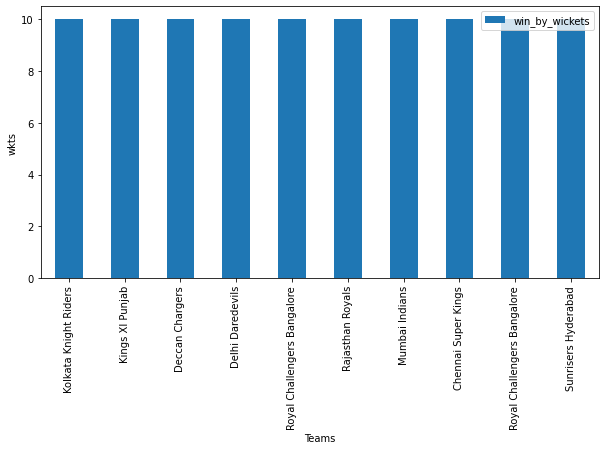

In [12]:
df[df['win_by_wickets']==df['win_by_wickets'].max()][['season','team1','team2','winner','win_by_wickets']].plot(x='winner',y='win_by_wickets',kind='bar',figsize=(10,5))
plt.xlabel('Teams')
plt.ylabel('wkts')
plt.show()

### 5.	Which Team had won by closest Margin (minimum runs)?

In [13]:
df[df['win_by_runs']==1][['season','team1','team2','winner','win_by_runs','result']]

,season,team1,team2,winner,win_by_runs,result
58,2017,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,1,normal
105,2008,Kings XI Punjab,Mumbai Indians,Kings XI Punjab,1,normal
163,2009,Kings XI Punjab,Deccan Chargers,Kings XI Punjab,1,normal
344,2012,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,1,normal
350,2012,Mumbai Indians,Pune Warriors,Mumbai Indians,1,normal
518,2015,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,1,normal
598,2016,Gujarat Lions,Delhi Daredevils,Gujarat Lions,1,normal
614,2016,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,1,normal


### 6.	Which Team had won by minimum wicket?

In [14]:
df[df['win_by_wickets']==1][['season','team1','team2','winner','win_by_wickets','result']]

,season,team1,team2,winner,win_by_wickets,result
559,2015,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,1,normal


### 7.	Which Season had most number of matches?

In [15]:
df['season'].value_counts()

2013    76
2012    74
2011    73
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

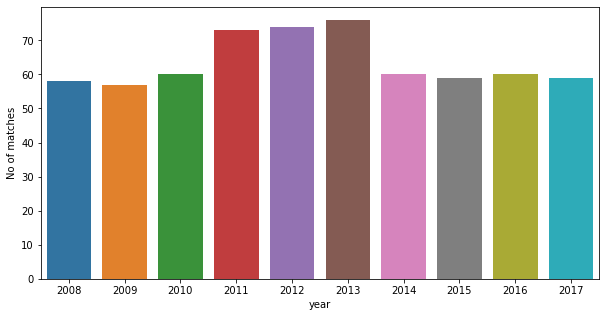

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['season'].value_counts().index,y=df['season'].value_counts().values)
plt.xlabel('year')
plt.ylabel('No of matches')
plt.show()

#### The season played in 2013 had most number of matches.

### 8.	Which IPL Team is more successful?

In [17]:
df['winner'].value_counts().head(1)

Mumbai Indians    92
Name: winner, dtype: int64

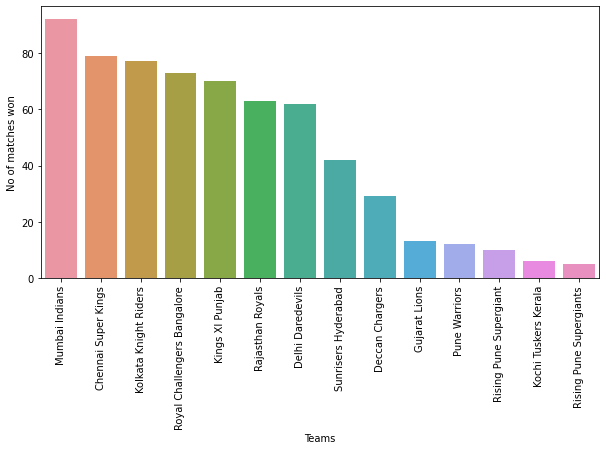

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['winner'].value_counts().index,y=df['winner'].value_counts().values)
plt.xticks(rotation=90)
plt.xlabel('Teams')
plt.ylabel('No of matches won')
plt.show()

#### Mumbai Indians is most successful team in IPL.

### 9.	Has Toss-winning helped in winning matches?

In [19]:
df[df['toss_winner']==df['winner']]['winner'].count()/636*100

51.100628930817614

#### There are 51% chances of toss-winning team to win the match. 

## Teams who win the toss and selecting field first and won the match

In [20]:
df[(df['toss_winner']==df['winner']) & (df['toss_decision']=='field')]['winner'].count()

201

## Teams who win the toss and selecting bat first and won the match

In [21]:
df[(df['toss_winner']==df['winner']) & (df['toss_decision']=='bat')]['winner'].count()

124

## players who won Man of the match title(top 10)

In [22]:
df['player_of_match'].value_counts().head(10)

CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
SK Raina          14
RG Sharma         14
MS Dhoni          13
G Gambhir         13
AM Rahane         12
MEK Hussey        12
Name: player_of_match, dtype: int64

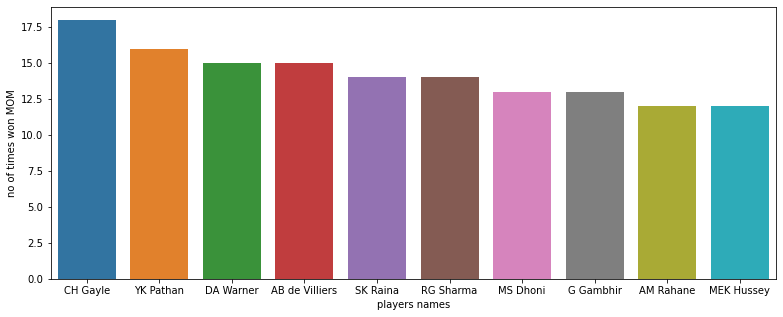

In [23]:
plt.figure(figsize=(13,5))
sns.barplot(x=df['player_of_match'].value_counts().head(10).index,y=df['player_of_match'].value_counts().head(10).values)
plt.xlabel('players names')
plt.ylabel('no of times won MOM')
plt.show()

## In which stadium maximum matches played

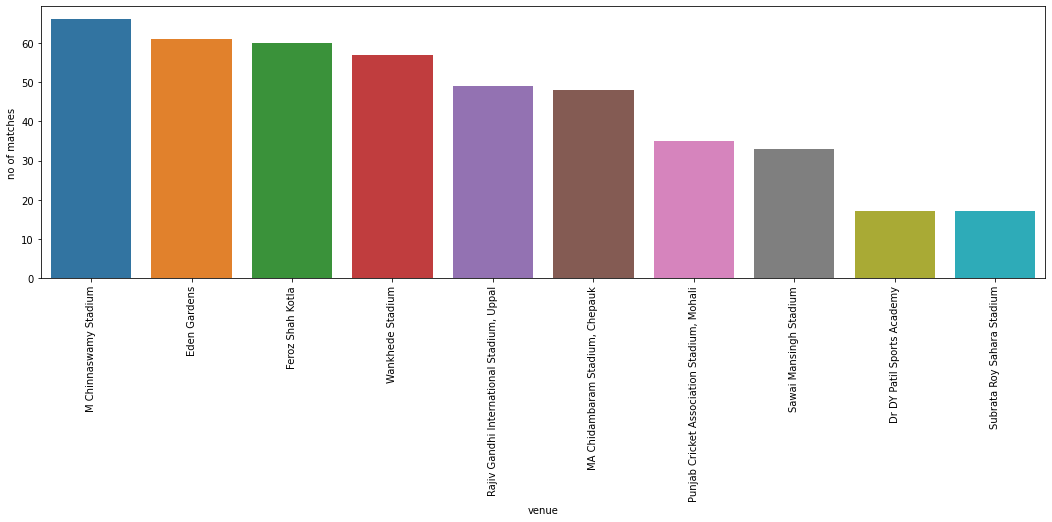

In [24]:
plt.figure(figsize=(18,5))
sns.barplot(x=df['venue'].value_counts().head(10).index,y=df['venue'].value_counts().head(10).values)
plt.xlabel('venue')
plt.ylabel('no of matches')
plt.xticks(rotation =90)
plt.show()

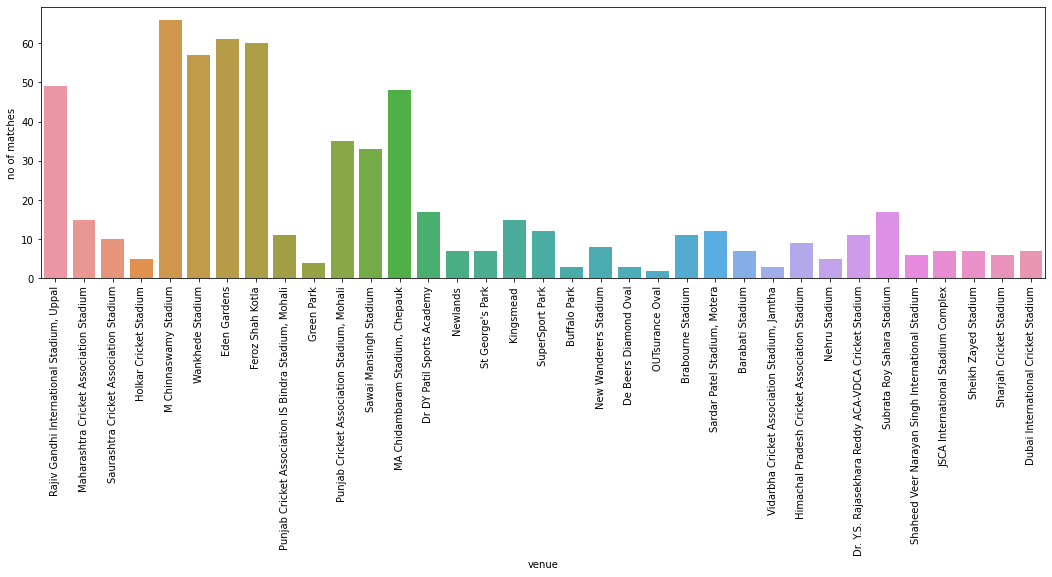

In [25]:
plt.figure(figsize=(18,5))
sns.countplot(x=df['venue'])
plt.xlabel('venue')
plt.ylabel('no of matches')
plt.xticks(rotation =90)
plt.show()

## In How many matches DL is applied

In [26]:
df[df['dl_applied']!=0][['season','team1','team2','winner','win_by_wickets','win_by_runs','result','venue']]

,season,team1,team2,winner,win_by_wickets,win_by_runs,result,venue
56,2017,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,7,0,normal,M Chinnaswamy Stadium
99,2008,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,0,6,normal,Feroz Shah Kotla
102,2008,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,0,3,normal,Eden Gardens
119,2009,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,10,0,normal,Newlands
122,2009,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,0,11,normal,Kingsmead
148,2009,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,0,12,normal,SuperSport Park
251,2011,Chennai Super Kings,Kochi Tuskers Kerala,Kochi Tuskers Kerala,7,0,normal,Nehru Stadium
280,2011,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,0,10,normal,Eden Gardens
290,2011,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,4,0,normal,M Chinnaswamy Stadium
488,2014,Delhi Daredevils,Sunrisers Hyderabad,Sunrisers Hyderabad,8,0,normal,Feroz Shah Kotla


In [27]:
df[df['dl_applied']!=0][['season','team1','team2','winner','win_by_wickets','win_by_runs','result']].groupby('season')['result'].count()

season
2008    2
2009    3
2011    3
2014    1
2015    2
2016    4
2017    1
Name: result, dtype: int64

#### we can see in 2016 year DL is applied on  more number of matches

In [28]:
df[(df['toss_winner']==df['winner']) & (df['toss_decision']=='field')]['venue'].value_counts().head(10)

M Chinnaswamy Stadium                         32
Eden Gardens                                  22
Feroz Shah Kotla                              19
Wankhede Stadium                              17
Rajiv Gandhi International Stadium, Uppal     12
Sawai Mansingh Stadium                        12
Punjab Cricket Association Stadium, Mohali    11
Maharashtra Cricket Association Stadium        9
Dr DY Patil Sports Academy                     6
SuperSport Park                                5
Name: venue, dtype: int64

In [29]:
df[(df['toss_winner']==df['winner']) & (df['toss_decision']=='bat')]['venue'].value_counts().head(10)

MA Chidambaram Stadium, Chepauk               21
Eden Gardens                                  12
Feroz Shah Kotla                              12
Wankhede Stadium                              10
Subrata Roy Sahara Stadium                     9
Kingsmead                                      6
Punjab Cricket Association Stadium, Mohali     5
Rajiv Gandhi International Stadium, Uppal      5
M Chinnaswamy Stadium                          4
Brabourne Stadium                              4
Name: venue, dtype: int64

##  create dataframe total no of matches in stadium , no wins 1st bat,no win 2nd bating(toss win)

In [30]:
di = dict(df[(df['toss_winner']==df['winner']) & (df['toss_decision']=='bat')]['venue'].value_counts())
di

{'MA Chidambaram Stadium, Chepauk': 21,
 'Eden Gardens': 12,
 'Feroz Shah Kotla': 12,
 'Wankhede Stadium': 10,
 'Subrata Roy Sahara Stadium': 9,
 'Kingsmead': 6,
 'Punjab Cricket Association Stadium, Mohali': 5,
 'Rajiv Gandhi International Stadium, Uppal': 5,
 'M Chinnaswamy Stadium': 4,
 'Brabourne Stadium': 4,
 'SuperSport Park': 3,
 'Sawai Mansingh Stadium': 3,
 "St George's Park": 3,
 'Newlands': 3,
 'Sheikh Zayed Stadium': 3,
 'Dr DY Patil Sports Academy': 3,
 'Sardar Patel Stadium, Motera': 3,
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': 2,
 'Buffalo Park': 2,
 'Barabati Stadium': 2,
 'OUTsurance Oval': 1,
 'Himachal Pradesh Cricket Association Stadium': 1,
 'Shaheed Veer Narayan Singh International Stadium': 1,
 'De Beers Diamond Oval': 1,
 'Dubai International Cricket Stadium': 1,
 'Maharashtra Cricket Association Stadium': 1,
 'Vidarbha Cricket Association Stadium, Jamtha': 1,
 'JSCA International Stadium Complex': 1,
 'Nehru Stadium': 1}

In [31]:
di1 = dict(df[(df['toss_winner']==df['winner']) & (df['toss_decision']=='field')]['venue'].value_counts())
di1

{'M Chinnaswamy Stadium': 32,
 'Eden Gardens': 22,
 'Feroz Shah Kotla': 19,
 'Wankhede Stadium': 17,
 'Rajiv Gandhi International Stadium, Uppal': 12,
 'Sawai Mansingh Stadium': 12,
 'Punjab Cricket Association Stadium, Mohali': 11,
 'Maharashtra Cricket Association Stadium': 9,
 'Dr DY Patil Sports Academy': 6,
 'SuperSport Park': 5,
 'Himachal Pradesh Cricket Association Stadium': 4,
 'MA Chidambaram Stadium, Chepauk': 4,
 'Punjab Cricket Association IS Bindra Stadium, Mohali': 4,
 'Saurashtra Cricket Association Stadium': 4,
 'Holkar Cricket Stadium': 4,
 'Green Park': 4,
 'Kingsmead': 3,
 'Barabati Stadium': 3,
 'JSCA International Stadium Complex': 3,
 'Brabourne Stadium': 3,
 'New Wanderers Stadium': 3,
 'Sardar Patel Stadium, Motera': 3,
 'Sharjah Cricket Stadium': 2,
 'Dubai International Cricket Stadium': 2,
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': 2,
 'Sheikh Zayed Stadium': 2,
 'Shaheed Veer Narayan Singh International Stadium': 2,
 'OUTsurance Oval': 1,
 'New

In [32]:
df2 = pd.DataFrame(df.groupby('venue')['result'].count().sort_values(ascending=False))
df2['TossWin_select_first_bat_won'] = df2.index.map(di)
df2['TossWin_select_first_bowl_won'] = df2.index.map(di1)
df2['TossWin_select_first_bat_won'].replace({np.nan:0},inplace=True)
df2['TossWin_select_first_bowl_won'].replace({np.nan:0},inplace=True)
df2['TossWin_select_first_bat_won'] =df2['TossWin_select_first_bat_won'].astype(int)
df2['TossWin_select_first_bowl_won']=df2['TossWin_select_first_bowl_won'].astype(int)
df2

,result,TossWin_select_first_bat_won,TossWin_select_first_bowl_won
venue,,,
M Chinnaswamy Stadium,66,4,32
Eden Gardens,61,12,22
Feroz Shah Kotla,60,12,19
Wankhede Stadium,57,10,17
"Rajiv Gandhi International Stadium, Uppal",49,5,12
"MA Chidambaram Stadium, Chepauk",48,21,4
"Punjab Cricket Association Stadium, Mohali",35,5,11
Sawai Mansingh Stadium,33,3,12
Dr DY Patil Sports Academy,17,3,6


In [33]:
df2['TossWin_select_first_bat_won'] = df2.index.map(di)
df2

,result,TossWin_select_first_bat_won,TossWin_select_first_bowl_won
venue,,,
M Chinnaswamy Stadium,66,4.0,32
Eden Gardens,61,12.0,22
Feroz Shah Kotla,60,12.0,19
Wankhede Stadium,57,10.0,17
"Rajiv Gandhi International Stadium, Uppal",49,5.0,12
"MA Chidambaram Stadium, Chepauk",48,21.0,4
"Punjab Cricket Association Stadium, Mohali",35,5.0,11
Sawai Mansingh Stadium,33,3.0,12
Dr DY Patil Sports Academy,17,3.0,6


In [34]:
df2['TossWin_select_first_bowl_won'] = df2.index.map(di1)
df2

,result,TossWin_select_first_bat_won,TossWin_select_first_bowl_won
venue,,,
M Chinnaswamy Stadium,66,4.0,32.0
Eden Gardens,61,12.0,22.0
Feroz Shah Kotla,60,12.0,19.0
Wankhede Stadium,57,10.0,17.0
"Rajiv Gandhi International Stadium, Uppal",49,5.0,12.0
"MA Chidambaram Stadium, Chepauk",48,21.0,4.0
"Punjab Cricket Association Stadium, Mohali",35,5.0,11.0
Sawai Mansingh Stadium,33,3.0,12.0
Dr DY Patil Sports Academy,17,3.0,6.0


In [35]:
df2['TossWin_select_first_bat_won'].replace({np.nan:0},inplace=True)
df2['TossWin_select_first_bowl_won'].replace({np.nan:0},inplace=True)

In [36]:
df2['TossWin_select_first_bat_won'] =df2['TossWin_select_first_bat_won'].astype(int)
df2['TossWin_select_first_bowl_won']=df2['TossWin_select_first_bowl_won'].astype(int)
df2

,result,TossWin_select_first_bat_won,TossWin_select_first_bowl_won
venue,,,
M Chinnaswamy Stadium,66,4,32
Eden Gardens,61,12,22
Feroz Shah Kotla,60,12,19
Wankhede Stadium,57,10,17
"Rajiv Gandhi International Stadium, Uppal",49,5,12
"MA Chidambaram Stadium, Chepauk",48,21,4
"Punjab Cricket Association Stadium, Mohali",35,5,11
Sawai Mansingh Stadium,33,3,12
Dr DY Patil Sports Academy,17,3,6
